Regresión lineal multiple

In [15]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

import pandas as pd

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D


# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [16]:
# Descargar el archivo CSV desde la URL proporcionada y convertirlo a .txt
url = "C:\INTELIGENCIA_ARTIFICIAL-l\Labs\LAB2\kc_house_data.csv"
df = pd.read_csv(url)

# Seleccionar solo las columnas relevantes
df = df[['price', 'bedrooms','floors']]

# Guardar el archivo en formato .txt
df.to_csv('Casas.txt', sep='\t', index=False, header=False)

In [18]:
# Cargar datos
# data = np.loadtxt(os.path.join('Datasets', 'ex1data2.txt'), delimiter=',')
data = np.loadtxt('C:\INTELIGENCIA_ARTIFICIAL-l\Labs\LAB2\Casas.txt')
X = data[:, 1:3]  # Selecciona las columnas de características (bedrooms, floors)
y = data[:, 0]  # Selecciona la columna de etiquetas (price)
m = y.size
print(m)
# imprimir algunos puntos de datos
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

21613
  X[:,0] X[:, 1]         y
--------------------------
       3       1    221900
       3       2    538000
       2       1    180000
       4       1    604000
       3       1    510000
       4       1   1225000
       3       2    257500
       3       1    291850
       3       1    229500
       3       2    323000


In [19]:
def  featureNormalize(X):

    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [20]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[3. 1.]
 [3. 2.]
 [2. 1.]
 ...
 [2. 2.]
 [3. 2.]
 [2. 2.]]
Media calculada: [3.37084162 1.49430898]
Desviación estandar calculada: [0.93004031 0.5399764 ]
[[-0.39873715 -0.915427  ]
 [-0.39873715  0.93650577]
 [-1.47395936 -0.915427  ]
 ...
 [-1.47395936  0.93650577]
 [-0.39873715  0.93650577]
 [-1.47395936  0.93650577]]


In [21]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [22]:
print(X)

[[ 1.         -0.39873715 -0.915427  ]
 [ 1.         -0.39873715  0.93650577]
 [ 1.         -1.47395936 -0.915427  ]
 ...
 [ 1.         -1.47395936  0.93650577]
 [ 1.         -0.39873715  0.93650577]
 [ 1.         -1.47395936  0.93650577]]


In [23]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    # h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [24]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [540063.74417804  99728.13369537  76780.30400173]
El precio predecido para una casa de 1650 sq-ft y 3 dormitorios (usando el descenso por el gradiente): $177322048


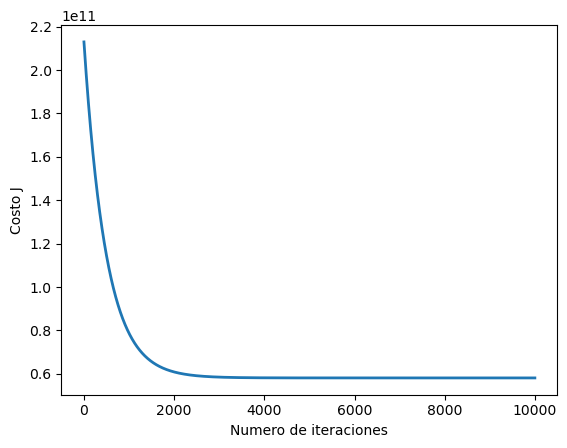

In [28]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # alpha = 0.003
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1, 1650, 3]
X_array[1:3] = (X_array[1:3] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido para una casa de 1650 sq-ft y 3 dormitorios (usando el descenso por el gradiente): ${:.0f}'.format(price))

pyplot.show()

In [29]:
X_array = [1, 1222, 3]
X_array[1:3] = (X_array[1:3] - mu) / sigma

In [30]:
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido para una casa de 1222 sq-ft y 3 dormitorios (usando el descenso por el gradiente): ${:.0f}'.format(price))

El precio predecido para una casa de 1222 sq-ft y 3 dormitorios (usando el descenso por el gradiente): $131427649


Ecuación de la normal

In [31]:
# Cargar datos
data = np.loadtxt('C:\INTELIGENCIA_ARTIFICIAL-l\Labs\LAB2\Casas.txt')
X = data[:, 1:3]  # Selecciona las columnas de características (bedrooms, floors)
y = data[:, 0]  # Selecciona la columna de etiquetas (price)
m = y.size
print(m)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

21613


In [32]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [33]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1, 500, 5]
price = np.dot(X_array, theta)

print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [-33852.58033523 107233.87120582 142187.67897314]
Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): $54294021


Regresión polinómica

In [75]:
# Cargar datos
data = np.loadtxt('C:\INTELIGENCIA_ARTIFICIAL-l\Labs\LAB2\Casas.txt')
X = data[:, 1:2]
y = data[:, 0]  # Selecciona la columna de etiquetas (price)
m = y.size
for i in range(20):
    print('{:8.0f}{:10.0f}'.format(X[i, 0], y[i]))

       3    221900
       3    538000
       2    180000
       4    604000
       3    510000
       4   1225000
       3    257500
       3    291850
       3    229500
       3    323000
       3    662500
       2    468000
       3    310000
       3    400000
       5    530000
       4    650000
       3    395000
       4    485000
       2    189000
       3    230000


In [76]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Edad personas')
    pyplot.xlabel('Capacidad adquisitiva 1,000s')
    pyplot.show()

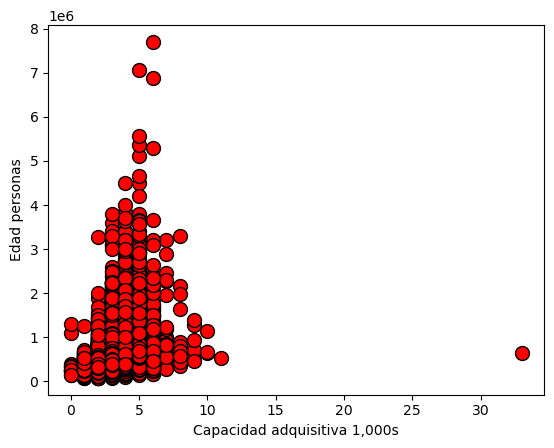

In [77]:
plotData(X, y)

In [78]:
X = np.concatenate([X, X * X], axis=1)

In [79]:
print(X)

[[3. 9.]
 [3. 9.]
 [2. 4.]
 ...
 [2. 4.]
 [3. 9.]
 [2. 4.]]


In [80]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [81]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

#print(X)
#print('Media calculada:', mu)
#print('Desviación estandar calculada:', sigma)
#print(X_norm)

In [82]:
print(X_norm)

[[-0.39873715 -0.32450702]
 [-0.39873715 -0.32450702]
 [-1.47395936 -0.82722145]
 ...
 [-1.47395936 -0.82722145]
 [-0.39873715 -0.32450702]
 [-1.47395936 -0.82722145]]


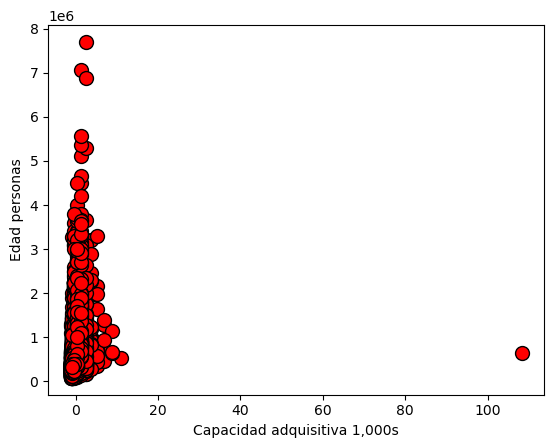

In [83]:
plotData(X_norm[:,1], y)

In [84]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
#X_norm = np.concatenate([X_norm, X_norm * X_norm], axis=1)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [85]:
print(X)

[[ 1.         -0.39873715 -0.32450702]
 [ 1.         -0.39873715 -0.32450702]
 [ 1.         -1.47395936 -0.82722145]
 ...
 [ 1.         -1.47395936 -0.82722145]
 [ 1.         -0.39873715 -0.32450702]
 [ 1.         -1.47395936 -0.82722145]]


In [86]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [88]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [540088.14176647 143201.85517555 -37403.24829586]
La capacidad adquisitiva para una persona de 33 (usando el descenso por el gradiente): $954871


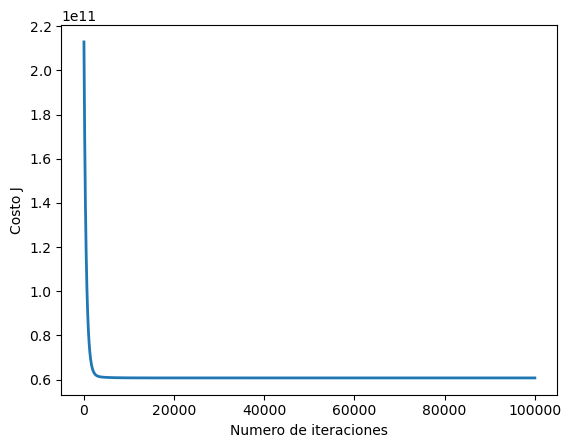

In [89]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 100000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# La capacidad adquisitiva de una persona de 33 años
X_array = [1, 34, 1156]
X_array[1:3] = (X_array[1:3] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('La capacidad adquisitiva para una persona de 33 (usando el descenso por el gradiente): ${:.0f}'.format(price))
pyplot.show()

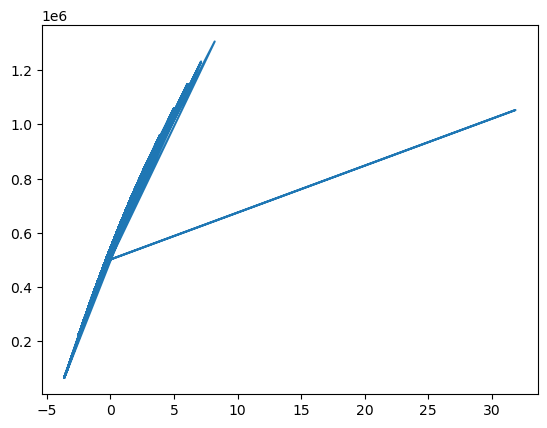

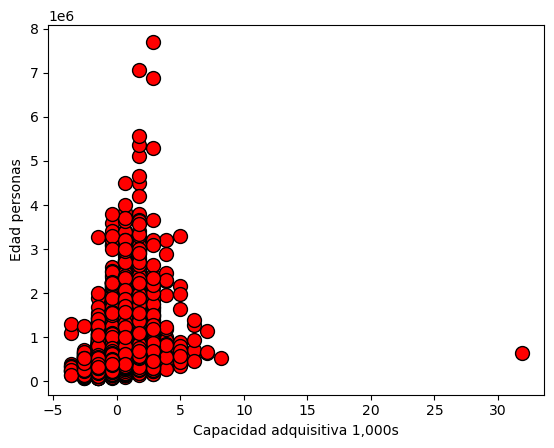

In [91]:
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')

In [92]:
X_array = [1, 23, 529]
X_array[1:3] = (X_array[1:3] - mu) / sigma

In [93]:
X_array[1:3]
print(np.dot(X_array, theta))

1619074.2729711623
